# AS09p Youtube comment clustering

在AS06萃取關鍵字的練習中，我們曾使用反送中相關影片之留言共八千則作為範例。這次的作業將邀請你使用該筆資料，先篩檢關鍵字，再透過群集法，嘗試找出留言有哪些主題、立場、或者網民討論的面向等等。這次的作業是開放式的結果，也就是每個人所找出來的主題或立場等可能不太一樣，但目標是一致的，找出這些文本裡面有哪些主題、在討論什麼。這種問問題的方式其實也出現在不少專題組別中。你在寫作業的過程，應該會不斷地感受到，這怎麼抽得出來主題？這真的抽得出來嗎？這樣抽出來的主題有效嗎？有意義嗎？然後為了獲得能說服自己的主題，你可能會不斷反覆篩選這些留言，卻又會遇到對代表性的質疑，也就是，縮減到這麼小的資料集合，做出來的結果會有代表性嗎？

所以這個作業有個目的是先讓你透過做作業了解到，如果你做的專題是想回答「這些文本裡面有哪些主題」，很可能會遇到什麼樣的問題。

本週的作業程式碼無特殊規定，要怎麼處理這些資料，或者要怎麼解釋跑出來的東西，都讓同學自由發揮。唯獨需要回答你做了什麼樣的篩檢，還有繪製出視覺化的群集結果，和自我評估用群集來找主題是否有效。

## (TODO) Answer the following questions

### (TODO)Document filtering strategies
目前作業給的資料一共有8000筆留言，每筆留言的欄位有發佈時間、更新時間、按讚數、也可以計算留言的字數，請問你採用了什麼樣的篩選策略？請於以下的文字框回答（編輯下方Markdown，需說明至少五個連續處理過程）。這種過程的書寫通常會出現在論文或者研究報告中，或者出現在學術海報的一小塊paragraph。

（範例答案）
1. 原資料有8000筆留言
2. 篩除XX數不滿XX的留言後，剩下XXX筆留言
3. 篩除XX後不滿XX後，剩下X筆留言
4. ...
5. ...

### (TODO)Vocabulary filtering strategies
在教學範例中，我們介紹不少Strategy來篩選不必要或必要的文字，請問你怎麼做關鍵字篩選？

1. 原始資料在斷詞後共有222744個相異字詞。（規定填寫）
2. 在經過篩除標點符號後，剩下183706個相異字詞。（規定填寫）
3. 再經過過濾「停用詞」和「空格」後，剩下116854個相異字詞。
4. 再利用TfidfVectorizer過濾重複出現超過0.1比例的無意義詞語後，剩下16137個相異字詞。

## Loading youtube data

### by colab

In [ ]:
!wget https://github.com/P4CSS/PSS/blob/master/data/yt-comment-antiELAB.xlsx?raw=true -O yt-comment-antiELAB.xlsx
import pandas as pd
df = pd.read_excel('yt-comment-antiELAB.xlsx') 
df

### by local notebook

In [84]:
import pandas as pd
df = pd.read_excel('../data/yt-comment-antiELAB.xlsx')
df

,videoId,commentId,parentId,authorDisplayName,textOriginal,likeCount,publishedAt,updatedAt
0,2_tXjqhbe5E,UgwQIF9qNqGydjE2NkN4AaABAg,NaN,CHI-HAU CHEN,鄭大哥和吉雷米的互動很可愛，歡迎加入台灣這個溫馨的家庭喔~~~~,19,2020-04-02T01:40:29Z,2020-04-02T01:40:29Z
1,2_tXjqhbe5E,UgwuP0Jva-U69xTMaEF4AaABAg,NaN,Funky Duck,牛嘴掩.....\n這高雄老外的台語能力應該比台北人好,1,2020-04-07T04:36:37Z,2020-04-07T04:36:37Z
2,2_tXjqhbe5E,UgyVlhx36V2XWLOM9MZ4AaABAg,NaN,Ally,Zoom把客戶資料洩給中國，現在紐約市已不讓學生用這系統視訊上課了!,0,2020-04-06T19:54:04Z,2020-04-06T19:54:04Z
3,2_tXjqhbe5E,Ugz4v7OudQxaDXYyegZ4AaABAg,NaN,Ally,法國人執行居家避疫比起美國比較確實，外出還要有通行證,0,2020-04-06T19:18:24Z,2020-04-06T19:18:24Z
4,2_tXjqhbe5E,Ugyb-ogACbZWVewnU-94AaABAg,NaN,Kitty Wong,仆街鄭,0,2020-04-06T15:20:34Z,2020-04-06T15:20:34Z
...,...,...,...,...,...,...,...,...
7995,ySMAcMAL6rY,UgzU9oD5I6q1qHLzx_B4AaABAg,NaN,nova lee,自己不是會算嗎,1,2019-08-22T04:00:31Z,2019-08-22T04:00:31Z
7996,zHlhQoT9OF0,Ugz2ff-Be0yCoEUY-Rd4AaABAg,NaN,the world Rock,常德說的真好,3,2020-04-10T03:21:34Z,2020-04-10T03:21:34Z
7997,zQWzh4yj_g8,Ugwex9I2lZWa-DgeWrx4AaABAg,NaN,Zoe Su,自私的人多的是，水準就和中國人一樣,1,2020-02-12T22:13:24Z,2020-02-12T22:13:24Z
7998,zQWzh4yj_g8,UgxpokMr9hHK0Ugcvl94AaABAg,NaN,非也非也,人都自私自利的，適者生存，不適者自己想辦法，沒有人會幫的，靠自己最實在,0,2020-02-12T04:53:28Z,2020-02-12T04:53:28Z


## Feature selections - selecting Model

In [85]:
# Chinese Tokenization with jieba
import jieba
df['token_text'] = df['textOriginal'].apply(lambda x:list(jieba.cut(x)))
df.head()

,videoId,commentId,parentId,authorDisplayName,textOriginal,likeCount,publishedAt,updatedAt,token_text
0,2_tXjqhbe5E,UgwQIF9qNqGydjE2NkN4AaABAg,NaN,CHI-HAU CHEN,鄭大哥和吉雷米的互動很可愛，歡迎加入台灣這個溫馨的家庭喔~~~~,19,2020-04-02T01:40:29Z,2020-04-02T01:40:29Z,"[鄭, 大哥, 和, 吉雷米, 的, 互動, 很, 可, 愛, ，, 歡迎, 加入, 台灣,..."
1,2_tXjqhbe5E,UgwuP0Jva-U69xTMaEF4AaABAg,NaN,Funky Duck,牛嘴掩.....\n這高雄老外的台語能力應該比台北人好,1,2020-04-07T04:36:37Z,2020-04-07T04:36:37Z,"[牛嘴, 掩, ....., \n, 這高雄, 老外, 的, 台語, 能力, 應該, 比, ..."
2,2_tXjqhbe5E,UgyVlhx36V2XWLOM9MZ4AaABAg,NaN,Ally,Zoom把客戶資料洩給中國，現在紐約市已不讓學生用這系統視訊上課了!,0,2020-04-06T19:54:04Z,2020-04-06T19:54:04Z,"[Zoom, 把, 客戶, 資料, 洩給, 中國, ，, 現在, 紐約市, 已, 不, 讓,..."
3,2_tXjqhbe5E,Ugz4v7OudQxaDXYyegZ4AaABAg,NaN,Ally,法國人執行居家避疫比起美國比較確實，外出還要有通行證,0,2020-04-06T19:18:24Z,2020-04-06T19:18:24Z,"[法國人, 執行, 居家, 避疫, 比起, 美國, 比較, 確實, ，, 外出, 還要, 有..."
4,2_tXjqhbe5E,Ugyb-ogACbZWVewnU-94AaABAg,NaN,Kitty Wong,仆街鄭,0,2020-04-06T15:20:34Z,2020-04-06T15:20:34Z,"[仆街, 鄭]"


In [90]:
documents = [d for doc in df['token_text'] for d in doc]

print(len(documents))
# df.head()

222744


In [91]:
import unicodedata # for removing Chinese puctuation

def remove_punc_by_unicode(words):
    out = []
    for word in words:
        if word != " " and not unicodedata.category(word[0]).startswith('P'):
            out.append(word)
    return out

df['cleaned'] = df['token_text'].apply(remove_punc_by_unicode)
documents = [d for doc in df['cleaned'] for d in doc]
print(len(documents))
# df.head()

183706


In [119]:
with open("C:/Users/Sing-hao Ku/Desktop/Github/PSS/data/stopwords_zh-tw.txt", encoding="utf-8") as fin:
    stopwords = fin.read().split("\n")[1:]
# print(stopwords[:100])

def remove_stopWords(words):
    out = []
    for word in words:
        if word not in stopwords and word != '\n':
            out.append(word)
    return out

df['cleaned'] = df['cleaned'].apply(remove_stopWords)
documents = [d for doc in df['cleaned'] for d in doc]
print(len(documents))

116854


In [121]:
from sklearn.feature_extraction.text import TfidfVectorizer
documents = [" ".join(doc) for doc in df['cleaned']]

tfidf_model = TfidfVectorizer(max_df=0.01).fit(documents)
print(len(tfidf_model.vocabulary_))

16137


In [122]:
X = tfidf_model.transform(documents)
X.shape

(8000, 16137)

## Clustering

### Evaluating

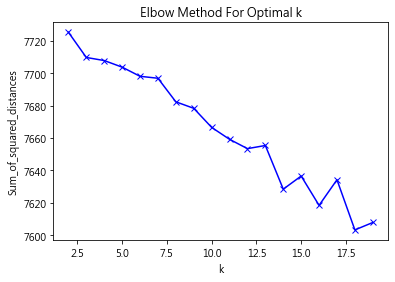

In [131]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(2,20)
for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10)
   km = km.fit(X)
   Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### Final clustering by k=?

In [130]:
true_k = 7
model = KMeans(n_clusters=true_k, 
               init='k-means++', 
               max_iter=200, 
               n_init=10,
               random_state= 0
              )
model.fit(X)
labels=model.labels_
df['cluster'] = labels

X.shape
df

,videoId,commentId,parentId,authorDisplayName,textOriginal,likeCount,publishedAt,updatedAt,token_text,cleaned,cluster
0,2_tXjqhbe5E,UgwQIF9qNqGydjE2NkN4AaABAg,NaN,CHI-HAU CHEN,鄭大哥和吉雷米的互動很可愛，歡迎加入台灣這個溫馨的家庭喔~~~~,19,2020-04-02T01:40:29Z,2020-04-02T01:40:29Z,"[鄭, 大哥, 和, 吉雷米, 的, 互動, 很, 可, 愛, ，, 歡迎, 加入, 台灣,...","[鄭, 大哥, 吉雷米, 互動, 愛, 歡迎, 加入, 台灣, 溫馨, 家庭, 喔]",0
1,2_tXjqhbe5E,UgwuP0Jva-U69xTMaEF4AaABAg,NaN,Funky Duck,牛嘴掩.....\n這高雄老外的台語能力應該比台北人好,1,2020-04-07T04:36:37Z,2020-04-07T04:36:37Z,"[牛嘴, 掩, ....., \n, 這高雄, 老外, 的, 台語, 能力, 應該, 比, ...","[牛嘴, 掩, 這高雄, 老外, 台語, 能力, 應該, 台北人, 好]",0
2,2_tXjqhbe5E,UgyVlhx36V2XWLOM9MZ4AaABAg,NaN,Ally,Zoom把客戶資料洩給中國，現在紐約市已不讓學生用這系統視訊上課了!,0,2020-04-06T19:54:04Z,2020-04-06T19:54:04Z,"[Zoom, 把, 客戶, 資料, 洩給, 中國, ，, 現在, 紐約市, 已, 不, 讓,...","[Zoom, 客戶, 資料, 洩給, 中國, 現在, 紐約市, 已, 學生用, 這系, 統視...",0
3,2_tXjqhbe5E,Ugz4v7OudQxaDXYyegZ4AaABAg,NaN,Ally,法國人執行居家避疫比起美國比較確實，外出還要有通行證,0,2020-04-06T19:18:24Z,2020-04-06T19:18:24Z,"[法國人, 執行, 居家, 避疫, 比起, 美國, 比較, 確實, ，, 外出, 還要, 有...","[法國人, 執行, 居家, 避疫, 美國, 比較, 確實, 外出, 還要, 通行, 證]",1
4,2_tXjqhbe5E,Ugyb-ogACbZWVewnU-94AaABAg,NaN,Kitty Wong,仆街鄭,0,2020-04-06T15:20:34Z,2020-04-06T15:20:34Z,"[仆街, 鄭]","[仆街, 鄭]",0
...,...,...,...,...,...,...,...,...,...,...,...
7995,ySMAcMAL6rY,UgzU9oD5I6q1qHLzx_B4AaABAg,NaN,nova lee,自己不是會算嗎,1,2019-08-22T04:00:31Z,2019-08-22T04:00:31Z,"[自己, 不是, 會算, 嗎]",[會算],0
7996,zHlhQoT9OF0,Ugz2ff-Be0yCoEUY-Rd4AaABAg,NaN,the world Rock,常德說的真好,3,2020-04-10T03:21:34Z,2020-04-10T03:21:34Z,"[常德, 說, 的, 真, 好]","[常德, 說, 真, 好]",0
7997,zQWzh4yj_g8,Ugwex9I2lZWa-DgeWrx4AaABAg,NaN,Zoe Su,自私的人多的是，水準就和中國人一樣,1,2020-02-12T22:13:24Z,2020-02-12T22:13:24Z,"[自私, 的, 人, 多, 的, 是, ，, 水準, 就, 和, 中國人, 一樣]","[自私, 人, 水準, 中國人]",0
7998,zQWzh4yj_g8,UgxpokMr9hHK0Ugcvl94AaABAg,NaN,非也非也,人都自私自利的，適者生存，不適者自己想辦法，沒有人會幫的，靠自己最實在,0,2020-02-12T04:53:28Z,2020-02-12T04:53:28Z,"[人, 都, 自私自利, 的, ，, 適者, 生存, ，, 不, 適者, 自己, 想, 辦法...","[人, 自私自利, 適者, 生存, 適者, 想, 辦法, 有人, 幫, 最實]",0


## Visualization

視覺化是必要選項。

In [132]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2, n_iter=7, random_state=0)
points = svd.fit_transform(X)

In [133]:
df_point = pd.DataFrame(points, columns = ['x', 'y'])
df_merge = pd.concat([df, df_point], axis='columns')
df_merge

,videoId,commentId,parentId,authorDisplayName,textOriginal,likeCount,publishedAt,updatedAt,token_text,cleaned,cluster,x,y
0,2_tXjqhbe5E,UgwQIF9qNqGydjE2NkN4AaABAg,NaN,CHI-HAU CHEN,鄭大哥和吉雷米的互動很可愛，歡迎加入台灣這個溫馨的家庭喔~~~~,19,2020-04-02T01:40:29Z,2020-04-02T01:40:29Z,"[鄭, 大哥, 和, 吉雷米, 的, 互動, 很, 可, 愛, ，, 歡迎, 加入, 台灣,...","[鄭, 大哥, 吉雷米, 互動, 愛, 歡迎, 加入, 台灣, 溫馨, 家庭, 喔]",0,4.387406e-03,1.127009e-02
1,2_tXjqhbe5E,UgwuP0Jva-U69xTMaEF4AaABAg,NaN,Funky Duck,牛嘴掩.....\n這高雄老外的台語能力應該比台北人好,1,2020-04-07T04:36:37Z,2020-04-07T04:36:37Z,"[牛嘴, 掩, ....., \n, 這高雄, 老外, 的, 台語, 能力, 應該, 比, ...","[牛嘴, 掩, 這高雄, 老外, 台語, 能力, 應該, 台北人, 好]",0,2.280384e-03,7.104513e-03
2,2_tXjqhbe5E,UgyVlhx36V2XWLOM9MZ4AaABAg,NaN,Ally,Zoom把客戶資料洩給中國，現在紐約市已不讓學生用這系統視訊上課了!,0,2020-04-06T19:54:04Z,2020-04-06T19:54:04Z,"[Zoom, 把, 客戶, 資料, 洩給, 中國, ，, 現在, 紐約市, 已, 不, 讓,...","[Zoom, 客戶, 資料, 洩給, 中國, 現在, 紐約市, 已, 學生用, 這系, 統視...",0,3.388535e-04,1.107109e-03
3,2_tXjqhbe5E,Ugz4v7OudQxaDXYyegZ4AaABAg,NaN,Ally,法國人執行居家避疫比起美國比較確實，外出還要有通行證,0,2020-04-06T19:18:24Z,2020-04-06T19:18:24Z,"[法國人, 執行, 居家, 避疫, 比起, 美國, 比較, 確實, ，, 外出, 還要, 有...","[法國人, 執行, 居家, 避疫, 美國, 比較, 確實, 外出, 還要, 通行, 證]",1,3.297554e-03,1.076458e-02
4,2_tXjqhbe5E,Ugyb-ogACbZWVewnU-94AaABAg,NaN,Kitty Wong,仆街鄭,0,2020-04-06T15:20:34Z,2020-04-06T15:20:34Z,"[仆街, 鄭]","[仆街, 鄭]",0,2.079430e-03,-1.552942e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,ySMAcMAL6rY,UgzU9oD5I6q1qHLzx_B4AaABAg,NaN,nova lee,自己不是會算嗎,1,2019-08-22T04:00:31Z,2019-08-22T04:00:31Z,"[自己, 不是, 會算, 嗎]",[會算],0,1.251677e-09,1.011616e-08
7996,zHlhQoT9OF0,Ugz2ff-Be0yCoEUY-Rd4AaABAg,NaN,the world Rock,常德說的真好,3,2020-04-10T03:21:34Z,2020-04-10T03:21:34Z,"[常德, 說, 的, 真, 好]","[常德, 說, 真, 好]",0,5.651889e-03,5.586667e-02
7997,zQWzh4yj_g8,Ugwex9I2lZWa-DgeWrx4AaABAg,NaN,Zoe Su,自私的人多的是，水準就和中國人一樣,1,2020-02-12T22:13:24Z,2020-02-12T22:13:24Z,"[自私, 的, 人, 多, 的, 是, ，, 水準, 就, 和, 中國人, 一樣]","[自私, 人, 水準, 中國人]",0,4.619349e-03,8.930353e-03
7998,zQWzh4yj_g8,UgxpokMr9hHK0Ugcvl94AaABAg,NaN,非也非也,人都自私自利的，適者生存，不適者自己想辦法，沒有人會幫的，靠自己最實在,0,2020-02-12T04:53:28Z,2020-02-12T04:53:28Z,"[人, 都, 自私自利, 的, ，, 適者, 生存, ，, 不, 適者, 自己, 想, 辦法...","[人, 自私自利, 適者, 生存, 適者, 想, 辦法, 有人, 幫, 最實]",0,2.135966e-03,6.072106e-03


In [134]:
from bokeh.models import ColumnDataSource, Label, LabelSet, Range1d
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [135]:
def generate_color(x, total):
    def color_red_blue(ctr, reverse=False):
        r = int(ctr*255)
        b = 255-int(ctr*255)
        if reverse:
            return "#%02x%02x%02x" % (b, 0, r)
        else:
            return "#%02x%02x%02x" % (r, 0, b)
    return color_red_blue(x/total)

p = figure(title = "doc clustering")


colors = df_merge['cluster'].apply(lambda x:generate_color(x, true_k))

from bokeh.palettes import Magma, Inferno, Plasma, Viridis, Cividis, d3
palletes = d3['Category20'][true_k]
colors = [palletes[clu] for clu in df_merge['cluster']]
# print(colors)
p.circle(df_merge["x"], df_merge["y"], color = colors, fill_alpha=0.2, size=10)
show(p)

In [136]:
from collections import defaultdict, Counter
cdict = defaultdict(Counter) # 兩層dictionary
for k, v in zip(df['cluster'], df['cleaned']):
    for word in v:
        cdict[k][word] += 1
for c in cdict:
    print(cdict[c].most_common(20))
    print("-"*80)

[('人', 1386), ('香港', 956), ('好', 566), ('說', 557), ('台灣', 502), ('真的', 340), ('知道', 309), ('做', 266), ('錢', 262), ('台湾', 259), ('一個', 230), ('⋯', 228), ('妳', 177), ('想', 175), ('女人', 175), ('说', 175), ('太', 173), ('黃', 173), ('節目', 167), ('中國', 166)]
--------------------------------------------------------------------------------
[('香港', 472), ('人', 423), ('台灣', 200), ('說', 176), ('好', 148), ('知道', 132), ('你们', 106), ('中國', 103), ('说', 90), ('大陆', 84), ('做', 83), ('土地', 77), ('警察', 76), ('吗', 76), ('什么', 76), ('真的', 74), ('中国', 73), ('美國', 72), ('他们', 70), ('逃犯', 69)]
--------------------------------------------------------------------------------
[('香港', 321), ('人', 294), ('一直', 106), ('說', 96), ('说', 90), ('台灣', 90), ('媒體', 85), ('好', 83), ('台湾', 82), ('中国', 82), ('真的', 80), ('多谢', 73), ('大陆', 66), ('吗', 61), ('你们', 61), ('做', 58), ('觉得', 54), ('Dollchung', 54), ('还', 52), ('支持', 51)]
--------------------------------------------------------------------------------
[('香港', 57), ('人', 

C:\Users\Sing-hao Ku\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8943 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Sing-hao Ku\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8943 missing from current font.
  font.set_text(s, 0, flags=flags)


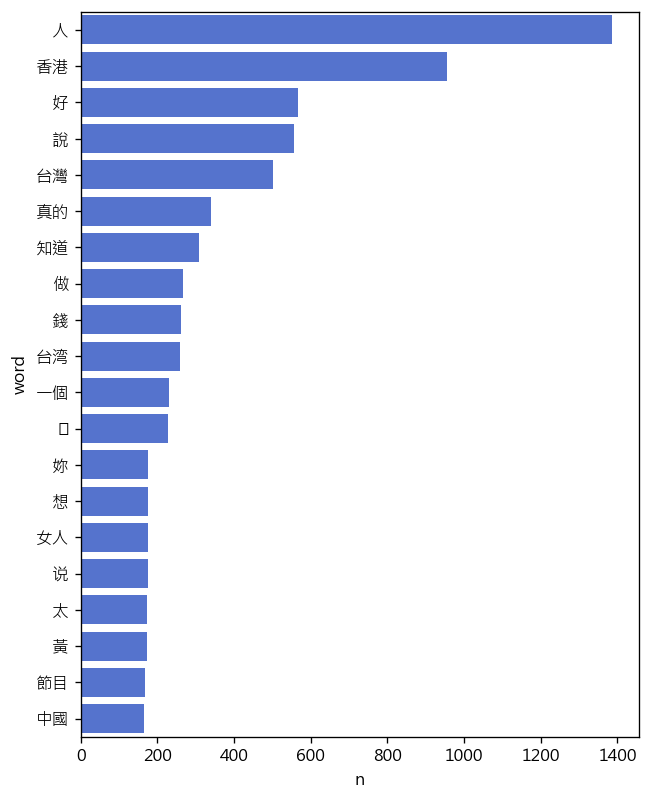

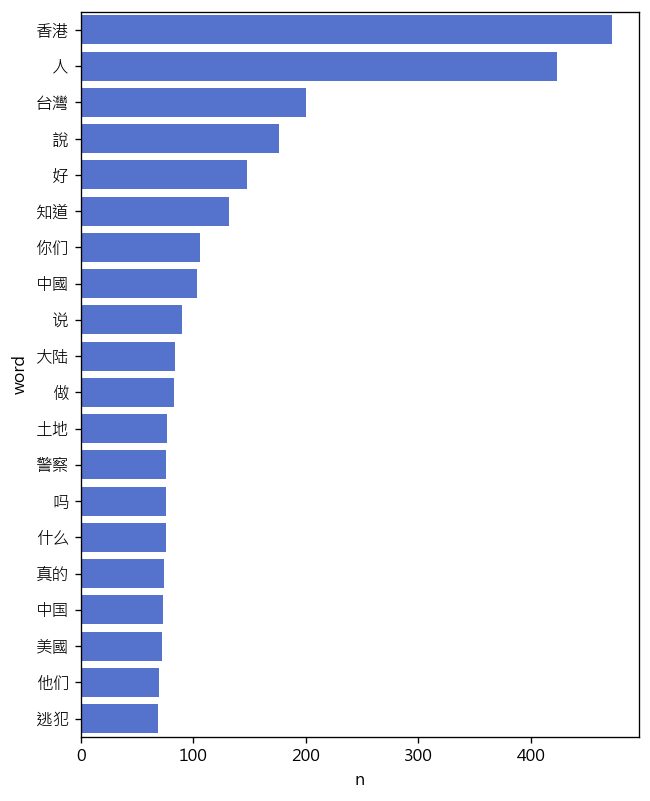

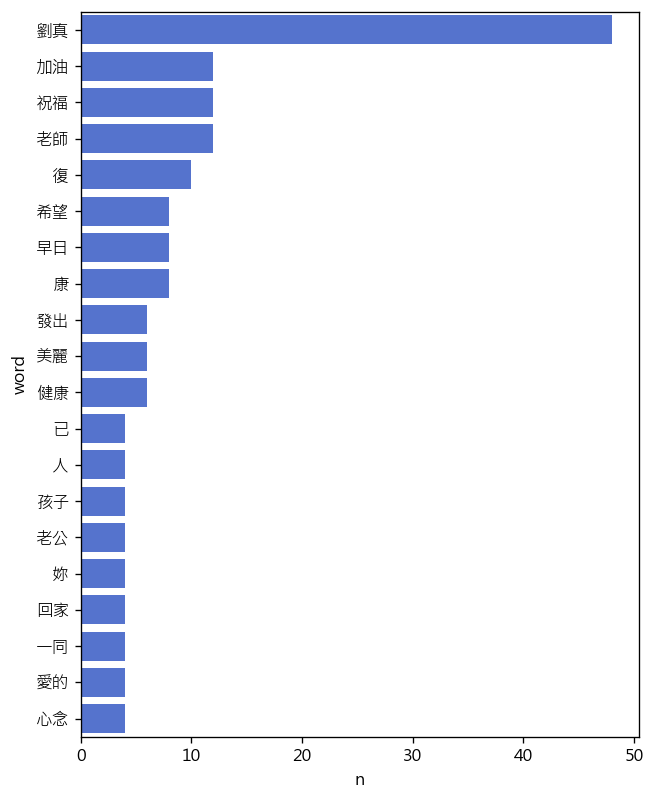

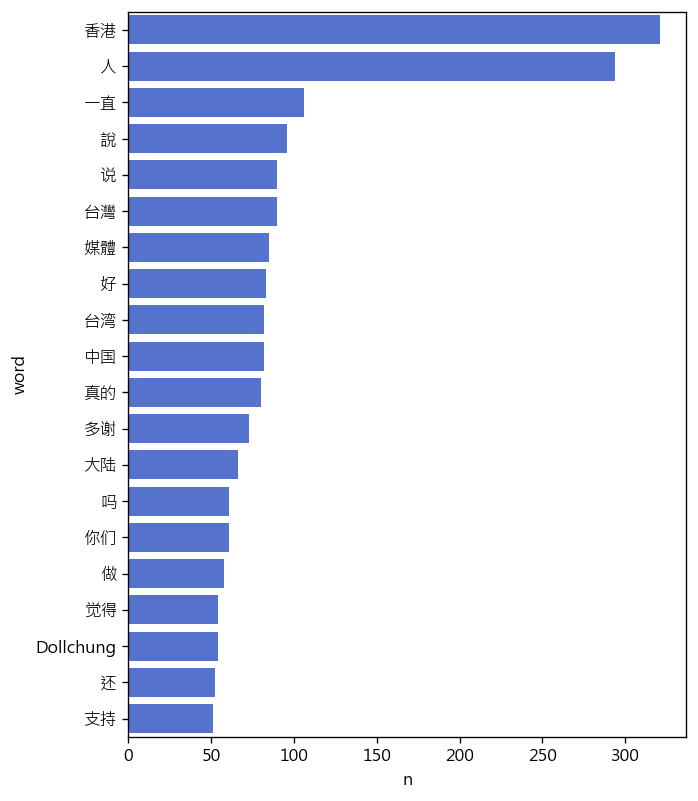

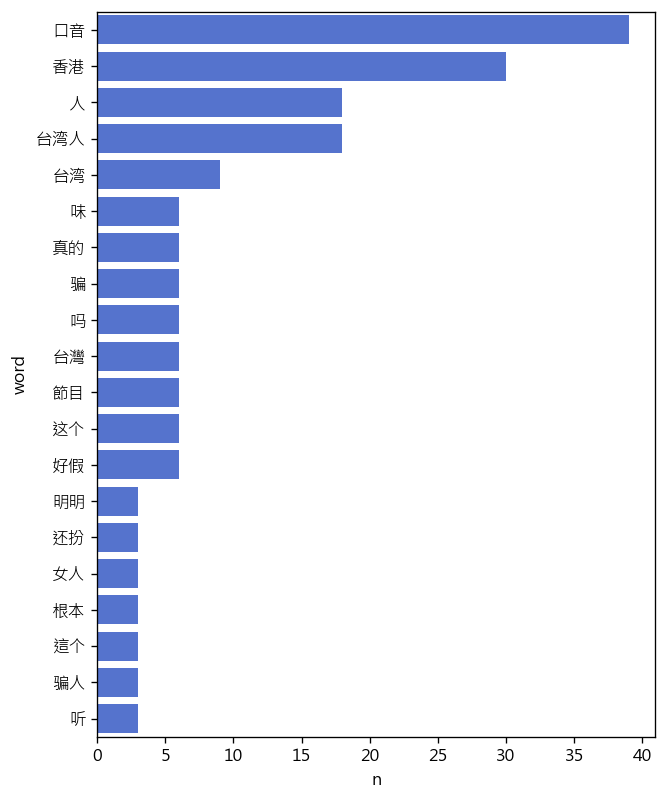

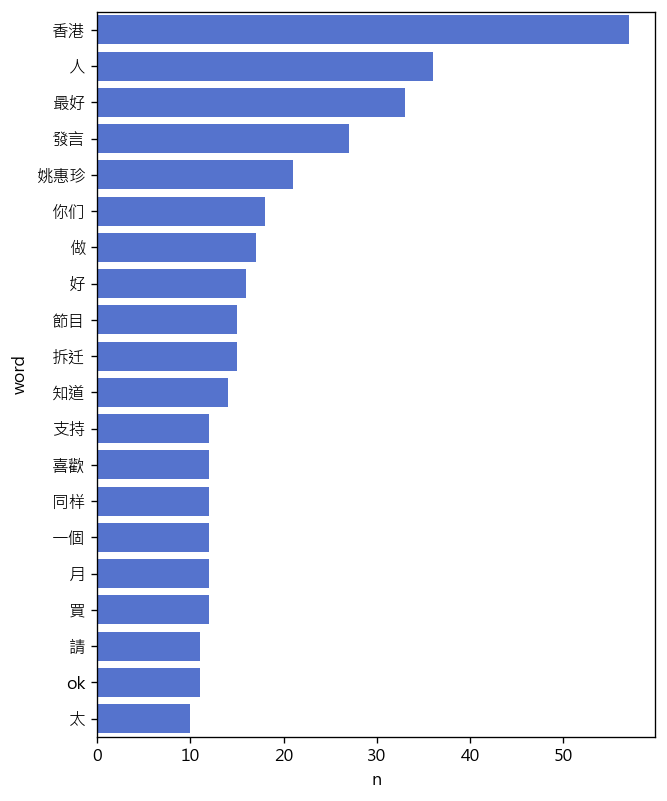

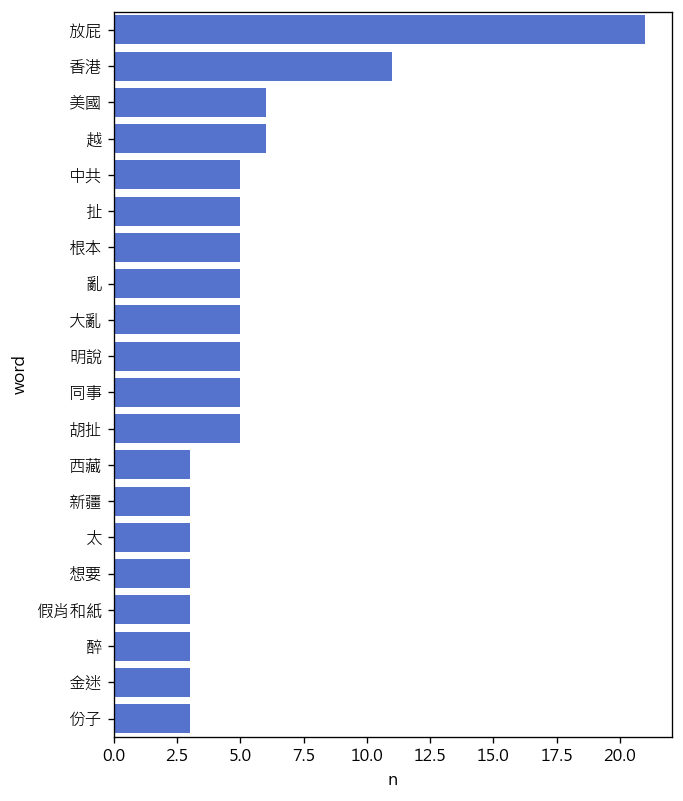

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = ['Microsoft JhengHei'] # 指定中文字體

for clu in range(true_k):
    df1 = pd.DataFrame(list(cdict[clu].most_common(20)), columns = ['word', 'n'])
    plt.figure(figsize=(6, 8), dpi=120) 
    df_data = df1.sort_values('n', ascending=False)
#     print(df_data)
    sns.barplot(x='n', 
                y='word', 
                data=df_data, 
                label='word', 
                color='royalblue',
               )

## (TODO) Explaining your results
從上述群集的結果，你觀察到有哪些留言群集？請評估你所找出來的關鍵字群集。

(Your Answer here)
在前述篩選策略下，從Evaluating的結果，我選擇以k=7作為群集數。
經視覺化每個群集的關鍵字後，一共發現以下幾大主題。
1. k=0: 該群集為的主要關鍵字為「香港」、「台灣」、「錢」、「女人」、「中國」、「節目」
2. k=1: 該群集的主要關鍵字為「香港」、「台灣」、「中國」、「大陸」、「土地」、「警察」
3. k=2: 該群集的主要關鍵字為「劉真」、「加油」、「祝福」、「健康」，屬於「劉真」主題
4. k=3: 該群集的主要關鍵字為「香港」、「台灣」、「媒體」、「中國」、「大陸」、「多謝」、「支持」
5. k=4: 該群集的主要關鍵字為「口音」、「香港」、「台灣」、「騙」、「節目」、「好假」、「騙人」
6. k=5: 該群集的主要關鍵字為「香港」、「發言」、「姚惠珍」、「節目」、「拆迁」、「支持」
7. k=6: 該群集的主要關鍵字為「放屁」、「香港」、「美國」、「中共」、「扯」、「亂」、「西藏」、「新疆」

有效的主題我認為共有「警察（除了k=1)」、「劉真（k=2）」、「媒體（k=3）」、「節目(k=0, 4, 5)」、「口音(k=4)」、「姚惠珍(k=5)」等6個主題。`k=2, 4, 5, 6`的群集只有單一關鍵字極高，其他關鍵字稀少，可能是受到的區隔太多(且幾乎每個群集都包含香港兩字，導致香港獨高)的影響。

## Final Modification (if you have)
經觀察前述群集結果後，我篩除了XXX關鍵字，重新進行群集後所得到的結果為以下幾個主題，分別包含「XXXX（k=0, 1」、「XXXXX（k=2）」、「XXXXX（k=3, 4）」、「」
